<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
import piplite
await piplite.install(['seaborn', 'pandas'])
#Import libraries:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

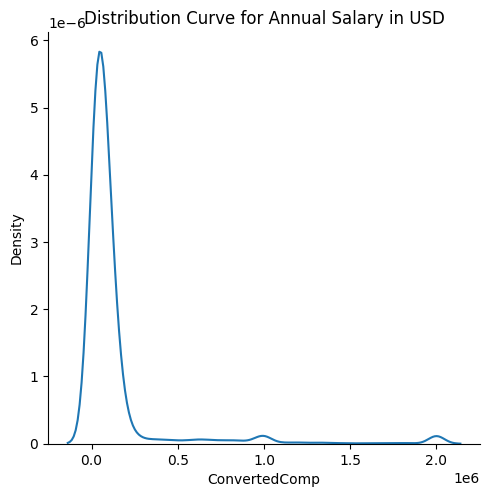

In [7]:
# your code goes here
sns.displot(df, x="ConvertedComp", kind="kde")
plt.title('Distribution Curve for Annual Salary in USD')
plt.show


Plot the histogram for the column `ConvertedComp`.


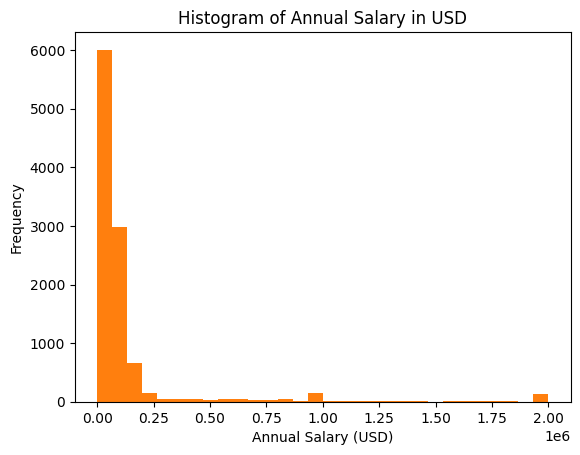

In [8]:
# your code goes here
plt.hist(x=df['ConvertedComp'], bins=30)
df['ConvertedComp'].plot(kind='hist', bins=30)
plt.title('Histogram of Annual Salary in USD')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
Gender=df['Gender'].value_counts()
#print(Gender)
print(Gender['Man'])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# min,q1,median,q3,max of a column
min_age= df['Age'].min()
q1_age= df['Age'].quantile(q=0.25)
median_age= df['Age'].median()
q3_age= df['Age'].quantile(q=0.75)
max_age= df['Age'].max()
print( 'Min:', min_age)
print( 'q1:', q1_age)
print( 'median:', median_age)
print( 'q3:', q3_age)
print( 'Max:', max_age)

Min: 16.0
q1: 25.0
median: 29.0
q3: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


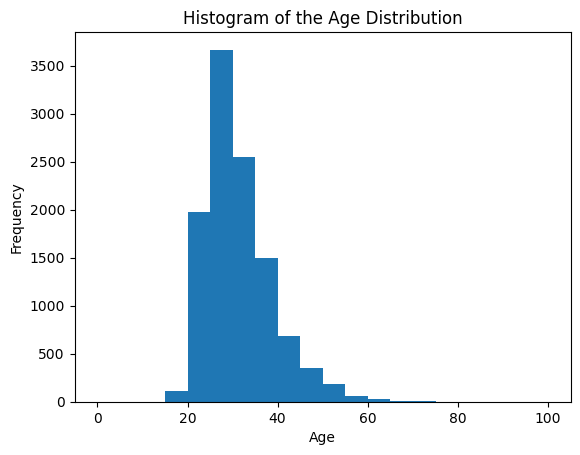

In [13]:
# your code goes here
#plt.hist(x=df['Age'], bins=20, range=(10, 80))
df['Age'].plot(kind='hist', bins=20, range=(0, 100))
plt.title('Histogram of the Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


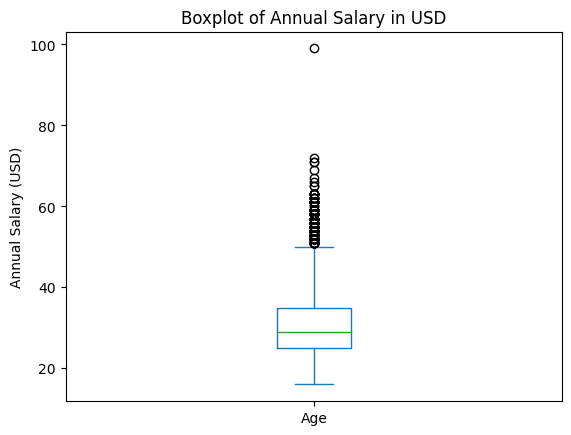

In [95]:
# box plot of ConvertedComp
df['ConvertedComp'].plot(kind='box')
plt.title('Boxplot of Annual Salary in USD')
plt.ylabel('Annual Salary (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [65]:
# IQR=Q3-Q1
q1_Sal= df['ConvertedComp'].quantile(q=0.25)
q3_Sal= df['ConvertedComp'].quantile(q=0.75)
iqr= q3_Sal-q1_Sal
print('IQR:', iqr)

IQR: 73132.0
26868.0 100000.0


Find out the upper and lower bounds.


In [63]:
# your code goes here
U_bound= q3_Sal+(iqr*1.5)
L_bound= q1_Sal-(iqr*1.5)
print("Upper bound:", U_bound)
print("Lower bound:", L_bound)

Upper bound: 209698.0
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [85]:
# your code goes here
outliers=df[df['ConvertedComp']>U_bound]
s=outliers.shape
print('Number of outlier:', s[0])

Number of outlier: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [96]:
# your code goes here
new_df= df[df['ConvertedComp']<U_bound]
new_df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [91]:
# your code goes here
#new_df.describe()
new_df.corr()

<ipython-input-91-b7f007b9113b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
